# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-72, 73, 83 (Stand: März 2024)

[Raum F2-19](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Gammaspektroskopie

Tin Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Nock E-Mail: uttzi@stundent.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Moritz Puritscher

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 29.04.24

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

In [1]:
# importieren aller nötiger Module
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import kafe2
import pathlib
from gamma_tools import fit_peak, fit_compton

In [2]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    fit.add_error(axis = 'x', err_val = xy_error[0])
    fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/README.md).**

## Aufgabe 1: Messanordnung

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit der Messanordnung vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Beschreibung der Messanordnung

 * Beschreiben Sie die Messanordnung, die Sie für diesen Versuch vorfinden in eigenen Worten.

---

Der vorgefundene Aufbau besteht aus einer radioaktiven Quelle, einer Messapparatur, dem MCA und einem daran angeschlossenen PC. Die Messapparatur besteht hierbei aus einem Szintillatorkristall, einem Photomultiplier und einem Photodetektor. Die Gammaquanten aus dem Präparat treffen auf den Kristall und werden dort über Comptonstreuung und den Photeffekt zuerst in Photonen niedrigerer Energie und dann in Elektronen umgewandelt. Im Photomultiplier werden diese Elektronen durch eine Beschleunigungsspannung und mehrere Dynoden vermehrt und dann über einen Widerstand vom MCA gemessen. Außerdem ist eine Spannungsquelle Teil des Experimentes, die die Beschleunigungsspannung liefert und stabilisiert. 


---

### Aufgabe 1.2: Oszilloskopische Untersuchung des Signal 

 * Untersuchen Sie das Signal eines beliebigen radioaktiven Präparats. 
 * Verwenden Sie hierzu den MCA als Oszilloskop. 
 * Beschreiben Sie Ihre Beobachtungen.

---

In der folgenden Grafik ist die gemessene Spannung im zeitlichen Verlauf zu sehen. Die Ereignisse, die vom Detektor aufgezeichnet werden, sind hierbei als Spannungsspitzen zu erkennen, die fast sofort ansteigen und danach exponentiell abklingen. Hierbei ist die Höhe der Spitze abhängig von der Energie, die wirklich vom Detektor gemessen wird. So können zwei Gammaquanten mit derselben Energie durch verschiedenen Effekte (z.B. Rückstreuung) zu verschiedenen Spannungen im Detektor übersetzt werden. Im letzten Peak ist erkennbar, dass zwei Photonen in sehr kurzem zetlichem Abstand gemessen werden, wodurch sich insgesamt eine höhere Erhebung ergibt, bei der eine zweite Spitze sichtbar ist. Dieser Effekt heißt pile-up.

![Oszilloskop](Messungen/Oszilloskop.jpeg)


---

### Aufgabe 1.3: Spektrale Untersuchung des Signal 

 * Untersuchen Sie zur Vorbereitung auf **Aufgabe 2** die Spektren der Präparate $_{\hphantom{0}55}^{137}\mathrm{Cs}$, $_{27}^{60}\mathrm{Co}$ und $_{11}^{22}\mathrm{Na}$.
 * Verwenden Sie hierzu den MCA in seiner eigentlichen Eigenschaft als Spektrumanalysator. 
 * Bestimmen Sie einen einheitlichen dynamischen Bereich, des MCA mit dem Sie alle folgenden Spektren aufzeichnen werden.

---

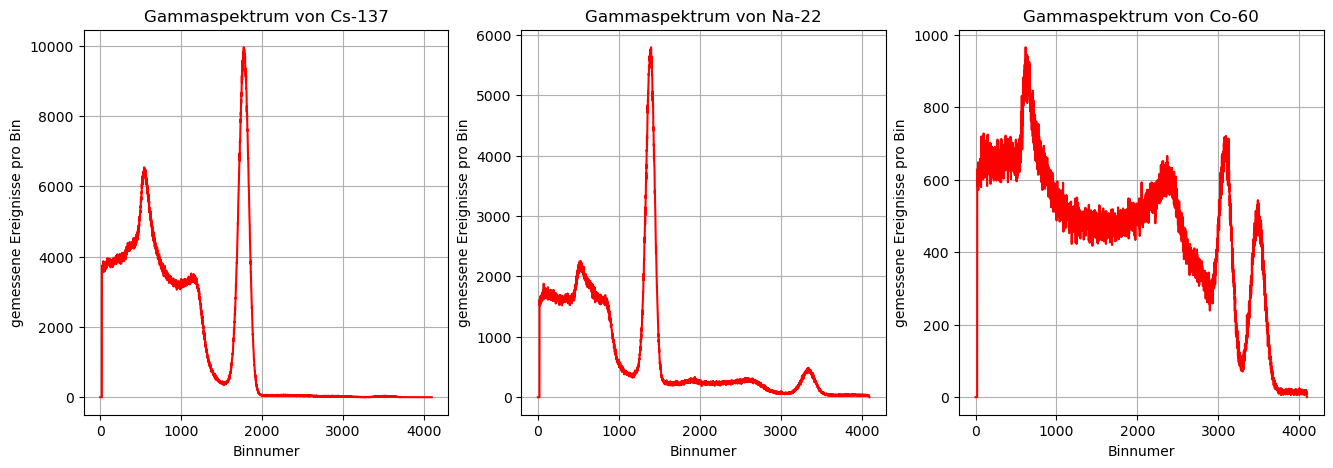

In [3]:
# einlesen der Daten für jedes Element
data_na = pd.read_csv('Messungen/Spektrum_Natrium_10min.csv')
hist_na = np.array(data_na['# mcpha spectrum 20240322-035950'])

data_cs = pd.read_csv('Messungen/Spektrum_Caesium_10min.csv')
hist_cs = np.array(data_cs['# mcpha spectrum 20240322-041100'])

data_co = pd.read_csv('Messungen/Spektrum_Cobalt_10min.csv')
hist_co = np.array(data_co['# mcpha spectrum 20240322-034640'])

# plotten in einer figure
fig_1 = plt.figure(figsize = (16,5))
ax = fig_1.add_subplot(1,3,1)
ay = fig_1.add_subplot(1,3,2)
az = fig_1.add_subplot(1,3,3)

ax.plot(hist_cs,'r')
ay.plot(hist_na,'r')
az.plot(hist_co,'r')

# schön machen des plots
ax.set_title('Gammaspektrum von Cs-137')
ay.set_title('Gammaspektrum von Na-22')
az.set_title('Gammaspektrum von Co-60')

ax.set_xlabel('Binnumer')
ay.set_xlabel('Binnumer')
az.set_xlabel('Binnumer')

ax.set_ylabel('gemessene Ereignisse pro Bin')
ay.set_ylabel('gemessene Ereignisse pro Bin')
az.set_ylabel('gemessene Ereignisse pro Bin')

ax.grid()
ay.grid()
az.grid()

plt.show()

In den oben gezeigten Graphen sind die Gammapspektren von drei radioaktiven Präparaten gezeigt, die mithilfe des oben beschriebenen Aufbaus über $10 min.$ aufgezeichnet wurden. Die Beschleunigungsspannung im Photomultiplier ist in allen Versuchen und den darauf folgenden gleich und beträgt $695V$. Diese Spannung wurde mithilfe des Co-60 bestimmt, da beim Zerfallen dieses am meisten Energie pro Quant frei wird. Auf die Strukturen der verschiedenen Spektren wird in einer späteren Aufgabe eingegangen.



---

## Aufgabe 2: Analyse der Impulshöhenspektren

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Analysieren Sie die Impulshöhenspektren der Präparate $_{\hphantom{0}55}^{137}\mathrm{Cs}$, $_{27}^{60}\mathrm{Co}$ und $_{11}^{22}\mathrm{Na}$. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Bestimmung des Untergrunds ohne Präparat

 * Führen Sie eine Messung ohne Präparat durch, um ein Spektrum des Untergrunds zu erhalten, der jeder weiteren Messung unterliegt.
 * Notieren Sie sich die Zeitspanne, in der Sie das Spektrum aufgenommen haben. 

---

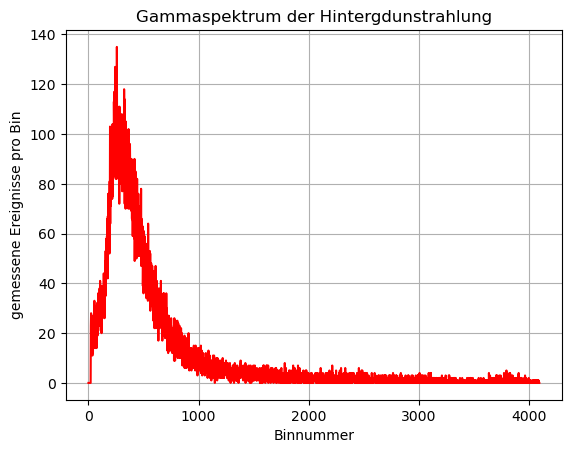

In [4]:
# einlesen der Daten für den Hintergrund
data_bgd = pd.read_csv('Messungen/Untergrund_Hist.csv')
hist_bgd = data_bgd['# mcpha spectrum 20240322-032733']

# plotten des Untergrundes
plt.plot(hist_bgd,'r')

plt.title('Gammaspektrum der Hintergdunstrahlung')
plt.xlabel('Binnummer')
plt.ylabel('gemessene Ereignisse pro Bin')
plt.grid()

plt.show()

Im oben dargestellten Diagramm ist die Aufzeichnung der Hintergrundstrahlung über eine Zeit von $30 min.$ Hierbei ergibt sich nur eine Spitze im eher unteren Energiebereich, die sich eventuell auf kosmische Hintergrundstrahlung zurückführen lässt.


---

### Aufgabe 2.2: Bestimmung der Impulshöhenspektren verschiedener Präparate

 * Führen Sie eine Messung für jedes der oben angegebenen Präparate durch.
 * Notieren Sie sich die Zeitspanne, in der Sie das jeweilge Spektrum aufgenommen haben. 
 * Charakterisieren Sie die Spektren, indem Sie **alle Strukturen**, die Sie darin vorfinden identifizieren.
 * Fügen Sie Darstellungen der Spektren, **wie gemessen**, ins Protokoll ein. Für die anschließende Versuchsauswertung sollten Sie diese Spektren auf den in **Aufgabe 2.1** bestimmten Untergrund korrigieren und die MCA-Kanäle mit Hilfe der in **Aufgabe 2.3** bestimmten Kalibrationkonstanten auf die Energie des Photons $E_{\gamma}$ kalibrieren.

---

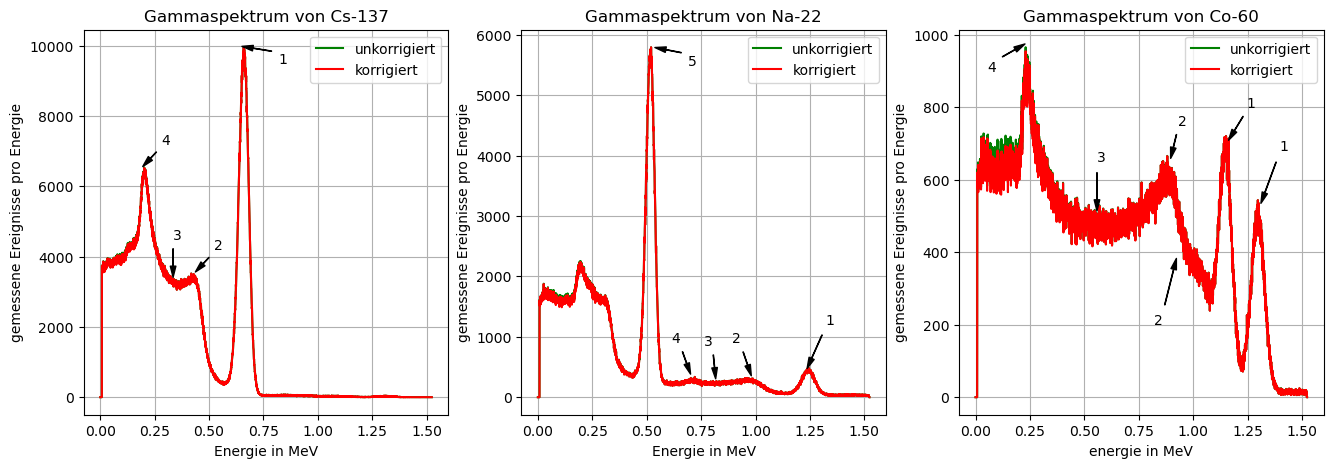

In [5]:
# definieren der x-Korrdianten
m = 0.000372
x = m * np.arange(4096)

# definieren der Pfeileigenschaften 
arrowprops = dict(facecolor='black',shrink=0.1,width=0.2,headwidth=4.,headlength=8.)

# erstellen der korrigierten Daten 
korr_cs = hist_cs-hist_bgd/3
korr_na = hist_na-hist_bgd/3
korr_co = hist_co-hist_bgd/3

# plotten in einer figure
fig_2 = plt.figure(figsize = (16,5))
ax = fig_2.add_subplot(1,3,1)
ay = fig_2.add_subplot(1,3,2)
az = fig_2.add_subplot(1,3,3)

ax.plot(x,hist_cs,'g', label='unkorrigiert')
ay.plot(x,hist_na,'g', label='unkorrigiert')
az.plot(x,hist_co,'g', label='unkorrigiert')

ax.plot(x,korr_cs,'r', label='korrigiert')
ay.plot(x,korr_na,'r', label='korrigiert')
az.plot(x,korr_co,'r', label='korrigiert')

# schön machen des plots
ax.set_title('Gammaspektrum von Cs-137')
ay.set_title('Gammaspektrum von Na-22')
az.set_title('Gammaspektrum von Co-60')

# nummerierung der einzelnen Teile des Spektrums
ax.annotate('1', xy=(x[1700],10000),xytext=(x[2200],9500.),arrowprops=arrowprops)
ax.annotate('2', xy=(x[1150],3500),xytext=(x[1400],4200.),arrowprops=arrowprops)
ax.annotate('3', xy=(x[900],3300),xytext=(x[900],4500.),arrowprops=arrowprops)
ax.annotate('4', xy=(x[500],6500),xytext=(x[750],7200.),arrowprops=arrowprops)


ay.annotate('1', xy=(x[3300],400),xytext=(x[3550],1200.),arrowprops=arrowprops)
ay.annotate('2', xy=(x[2650],300),xytext=(x[2400],900.),arrowprops=arrowprops)
ay.annotate('3', xy=(x[2200],250),xytext=(x[2050],850.),arrowprops=arrowprops)
ay.annotate('4', xy=(x[1900],330),xytext=(x[1650],900.),arrowprops=arrowprops)
ay.annotate('5', xy=(x[1400],5800),xytext=(x[1850],5500),arrowprops=arrowprops)

az.annotate('1', xy=(x[3100],700),xytext=(x[3350],800),arrowprops=arrowprops)
az.annotate('1', xy=(x[3500],520),xytext=(x[3750],680),arrowprops=arrowprops)
az.annotate('2', xy=(x[2400],650),xytext=(x[2500],750),arrowprops=arrowprops)
az.annotate('3', xy=(x[1500],500),xytext=(x[1500],650),arrowprops=arrowprops)
az.annotate('4', xy=(x[650],980),xytext=(x[150],900),arrowprops=arrowprops)
az.annotate('2', xy=(x[2500],400),xytext=(x[2200],200),arrowprops=arrowprops)

ax.set_xlabel('Energie in MeV')
ay.set_xlabel('Energie in MeV')
az.set_xlabel('energie in MeV')

ax.set_ylabel('gemessene Ereignisse pro Energie')
ay.set_ylabel('gemessene Ereignisse pro Energie')
az.set_ylabel('gemessene Ereignisse pro Energie')

ax.grid()
ay.grid()
az.grid()

ax.legend()
ay.legend()
az.legend()

plt.show()

In diesen Diagrammen sind nocheinmal die Spektren der drei Präparate zu sehen, wobei jedoch der Strahlungsuntergrund abgezogen wurde. Die unkorrigierten Graphen sind hinter den eigentlichen in grün zu sehen. Außerdem wurden die $30min.$ über die der Untergrund gemessen wurde um den Faktor 3 heruntergerechnet, damit sich ein passendes Äquivalent ergibt. 

Charakterisierung der Strukturen:
- 1: Es handelt sich um den Photopeak, bei dem die Gammaphotonen in ihrer vollen Energie gemessen werden. Beim Präparat Co-60 treten hierbei zwei dieser Peaks auf, da dieses Photonen zweier Frequenzen aussendet. Sie führen auch zu zwei sich überlagernden Restspektren.
- 2: Diese Kante wird Comptonkante genannt. Sie entsteht dadurch, dass ein Photon in den Detektor eintritt, die maximal mögliche Energie bei Comptonstreuung an ein Elektron abgibt und den Detektor wieder verlässt. Zwischen Comptonkante und Photopeak findet eine mehrfache Comtonstreuung statt, bei der das Photon ebenfalls den Detektor wieder verlässt. Diese treten jedoch sehr selten auf. 
- 3: Das Comptonkontinuum resultiert aus Comptonstreuung in einem beliebigen Winkel, sodass jedoch das Photon wieder austritt. Das passiert z.B. am Rande des Kritalles.
- 4: Die Rückstreuspitze beschreibt ebenfalls eine Comptonstreuung, bei der jedoch das Elektron den Detektor verlässt.
- 5: Hier ist eine Besonderheit des Natriums zu erkennen. Es findet ein $\beta$-Zerfall statt, der zu einem Ausschlag in den unteren Energiebreichen führt und wesentlich häufiger auftritt als der $\gamma$-Zerfall in Na-22. Außerdem zieht dieser Zerfall ebenso ein vollständiges Spektrum mit Comptonkante, Comptonkontinuum und Rückstreuspitze mit sich. 

---

### Aufgabe 2.3: Energie-Kalibration des Detektors

 * Kalibieren Sie mit Hilfe der in **Aufgabe 2.2** aufgezeichneten Spektren die Kanäle des MCA auf die Photonenergie $E_{\gamma}$. 
 * Fügen Sie eine Darstellung der Kalibrationspunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 

---

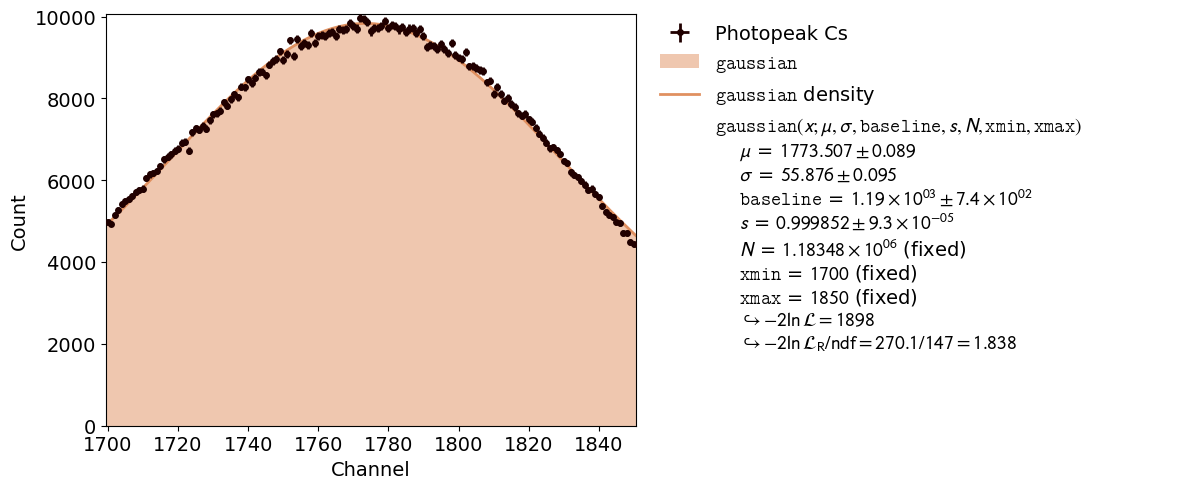

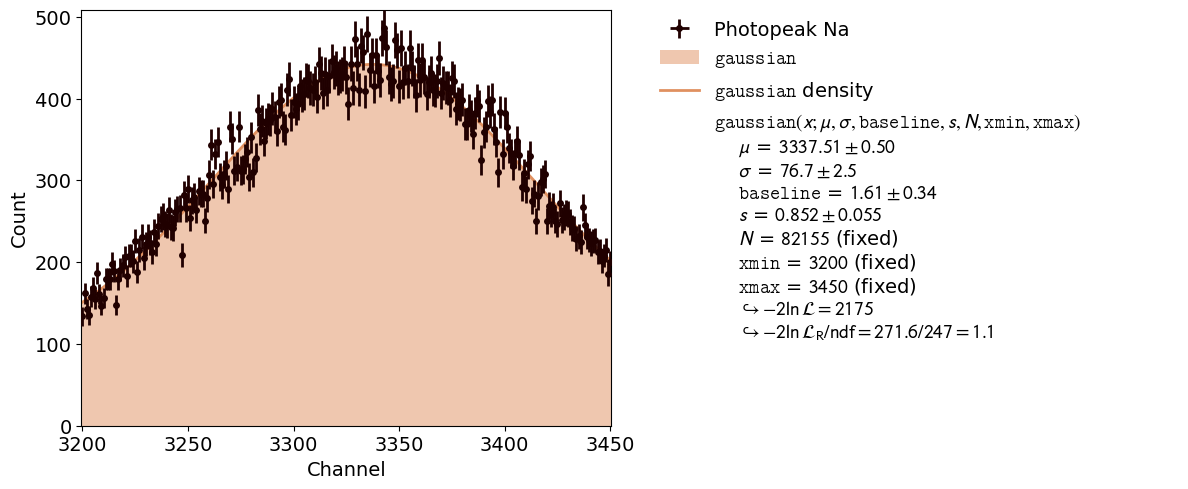

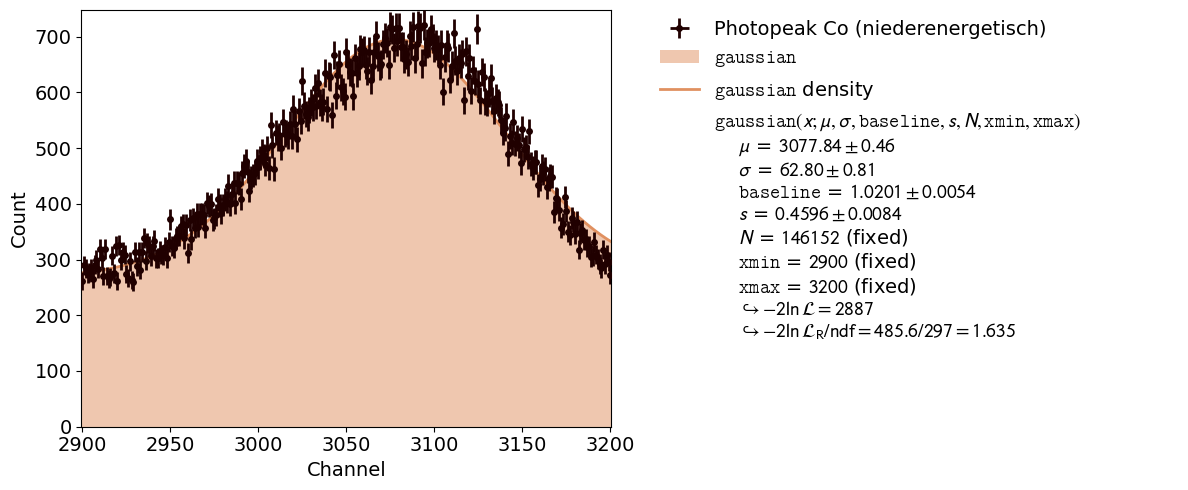

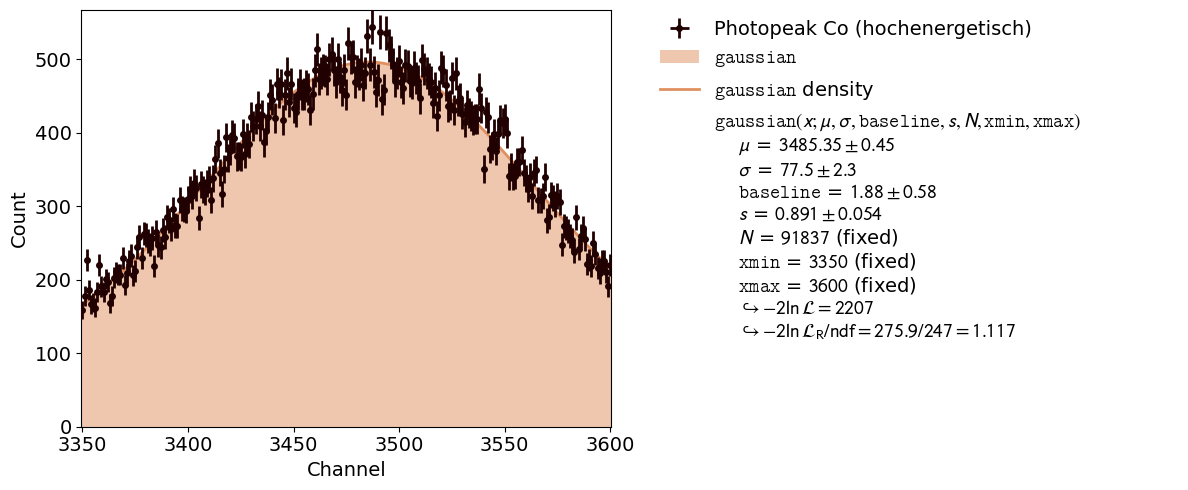

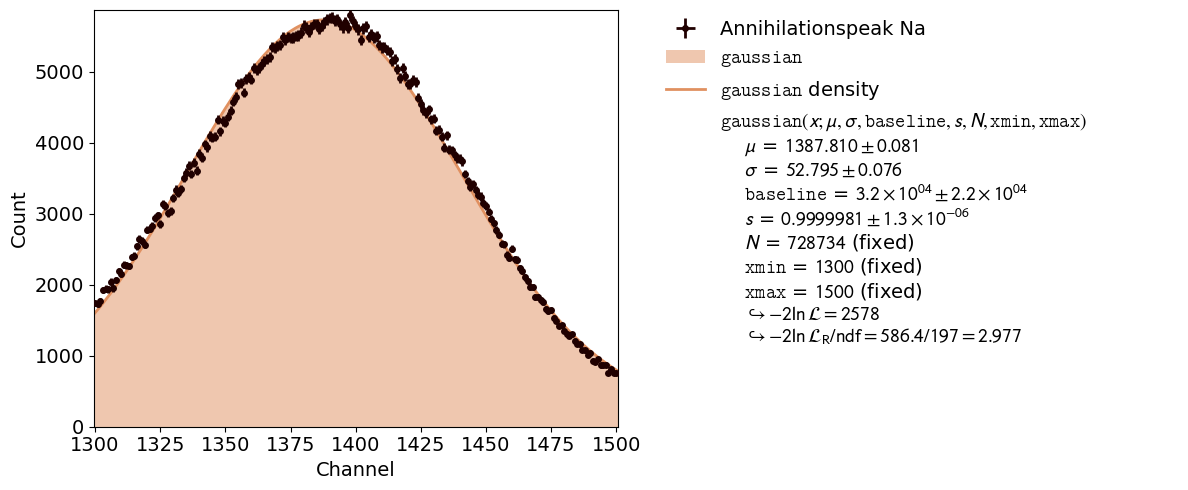

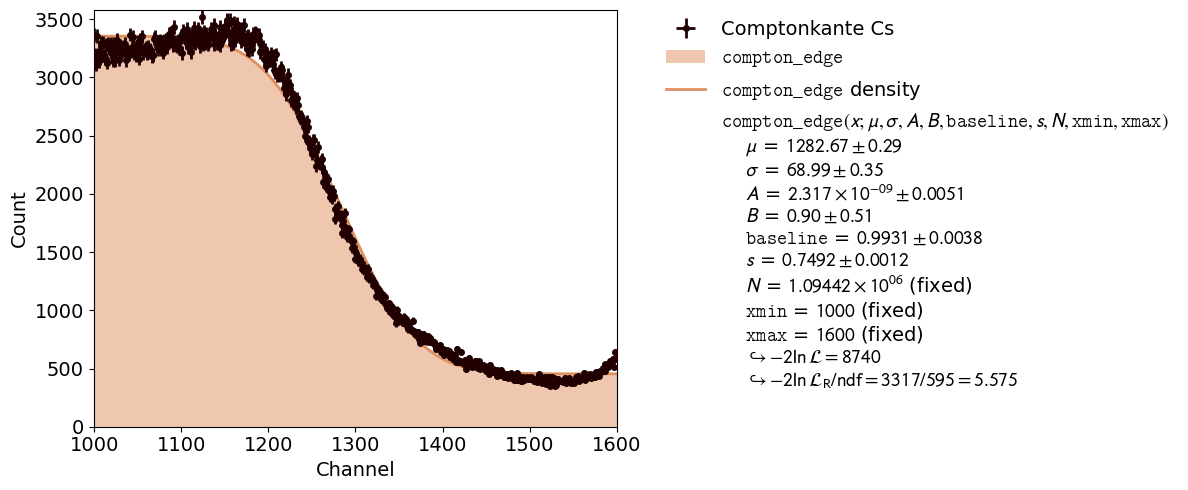

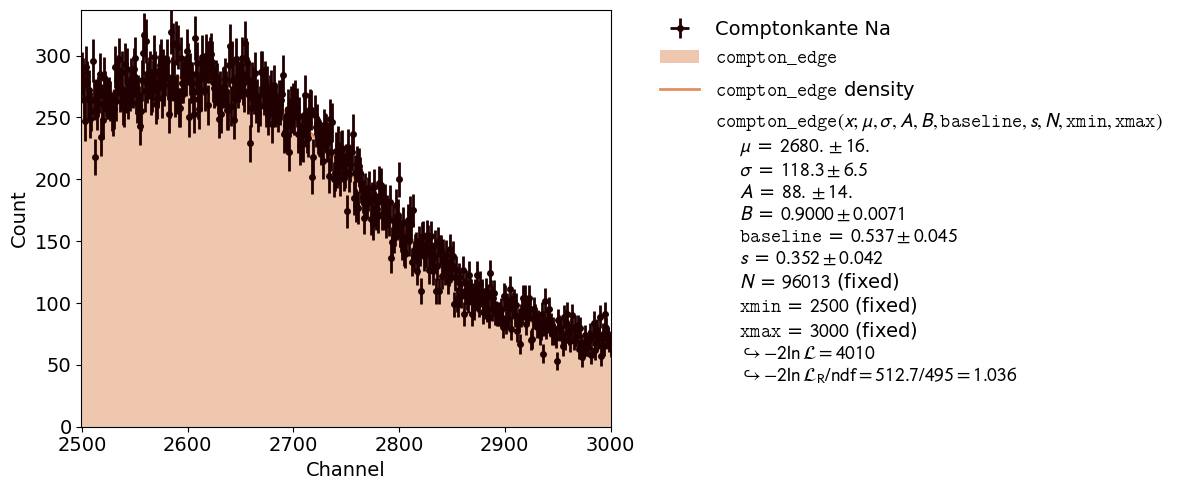

In [6]:
x = np.arange(4096)

photo_cs = fit_peak(x,hist_cs,1700,1850,label='Photopeak Cs')
photo_na = fit_peak(x,hist_na,3200,3450,label='Photopeak Na')
photo_co_lo = fit_peak(x,hist_co,2900,3200,label='Photopeak Co (niederenergetisch)')
photo_co_hi = fit_peak(x,hist_co,3350,3600,label='Photopeak Co (hochenergetisch)')
beta_na = fit_peak(x,hist_na,1300,1500,label='Annihilationspeak Na')

comp_cs = fit_compton(x,hist_cs,1000,1600,label='Comptonkante Cs')
comp_na = fit_compton(x,hist_na,2500,3000,label='Comptonkante Na')

fits_photo = [photo_cs,photo_na,photo_co_lo,photo_co_hi,beta_na]
fits_comp = [comp_cs,comp_na]

In [7]:
def compton_energie(E_y, E_el=0.511):
    return E_y*(1-1/(1+2*E_y/E_el))

E_comp_cs = compton_energie(0.644)
E_comp_na = compton_energie(1.2745)

E_photo = [0.6617,1.2745,1.1732,1.3325,0.511]
ener = E_photo + [E_comp_cs,E_comp_na]

mu = [fit.parameter_values[0] for fit in fits_photo] + [fit.parameter_values[0] for fit in fits_comp]
mu_std = [fit.parameter_errors[0] for fit in fits_photo] + [fit.parameter_errors[0] for fit in fits_comp]

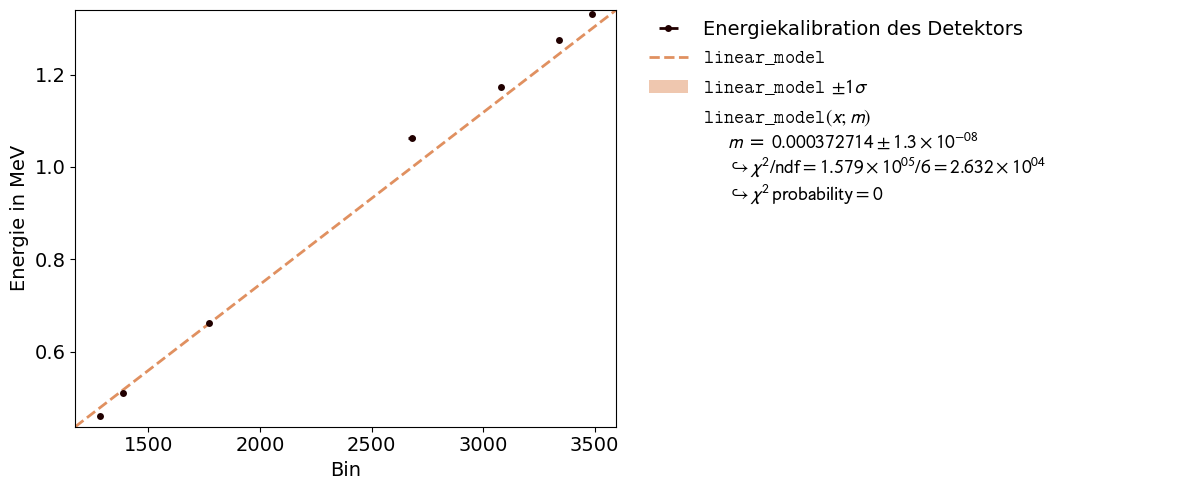

In [8]:
def linear_model(x,m):
    return m*x

fit_kalib = fit_funktion((mu,ener),linear_model,(mu_std,0),('Bin','Energie in MeV'),('Energiekalibration des Detektors'))[2]
fit_kalib.plot()
plt.show()

In diesem Versuchsteil wird mithilfe der Photopeaks und der Comptonkante ein Umrechnungsfaktor errechnet, der eine Übersetzung von Binnummer zu Energie ermöglicht. 

Durch eine Gausskurve, die an die Photopeaks und eine Errorfunktion die an die Comptonkanten angepasst wird findet man die jeweiligen Binnummern Dieser. Es lässt sich nun die Energie der verschiedenen Ereignisse gegenüber der Binnumer auftragen und über eine angelegte Gerade der Umrechnungsfaktor ermitteln. Außerdem kann die Energie, bei denen sich die Comptonkante befindet, über die Photonenenergie berechnet werden. 

Im vorliegenden Fit wurde mit allen Photopeaks, sowie dem Annihilationspeak gearbeitet, jedoch wurden die Comptonkanten von Co weggelassen, da diese zu ungenau sind und sich auch durch Fits nur schwer bestimmen lassen. Der lineare Fit, der zur schlussendlichen Bestimmung des Umrechnungsfaktors hat zwar ein sehr schlechtes $\chi^2$, was jedoch eher an den sehr kleinen Unsicherheiten liegt, als an der Genauigkeit der Messpunkte. Somit ist der Fit trotzdem akzeptabel.

Insgesamt ergibt sich somit der Umrechnungsfaktor von Binnummer zu Energie zu $m = 0.000372714 \pm 0.000000013 MeV$

---

### Aufgabe 2.4: Relative Energie-Auflösung des Detektors

 * Bestimmen Sie mit Hilfe der in **Aufgabe 2.2** aufgezeichneten Spektren die relative Energieauflösung des Detektors als Funktion von $E_{\gamma}$.
 * Fügen Sie eine Darstellung der bestimmten Messpunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 
 * Schätzen Sie basierend auf dieser Anpassung die erwartete Anzahl ausgeschlagener Elektronen $N_{\mathrm{e}}$ an der Photokathode des im Photodetektor verbauten Photomultipliers ab. 

---

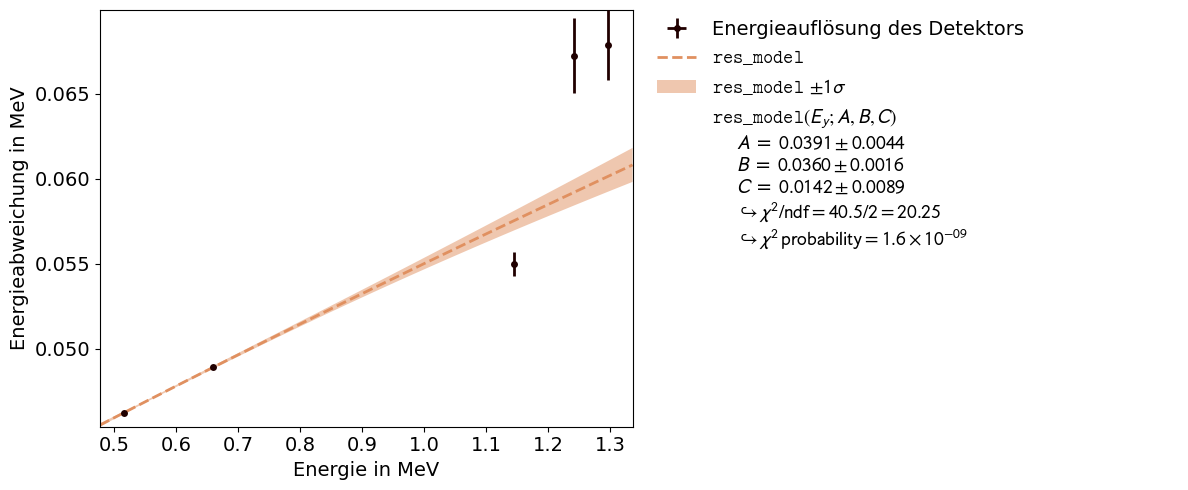

In [9]:
def res_model(E_y, A, B, C):
    return np.sqrt(A**2/E_y + B**2/E_y**2+C**2)*E_y
    
sig_photo = np.array([fit.parameter_values[1] for fit in fits_photo])
sig_photo_std = np.array([fit.parameter_errors[1] for fit in fits_photo])
mu_photo = np.array([fit.parameter_values[0] for fit in fits_photo])
mu_photo_std = np.array([fit.parameter_errors[0] for fit in fits_photo])

fwhm = 2*np.sqrt(2*np.log(2))* sig_photo
fwhm_std = 2*np.sqrt(2*np.log(2))* sig_photo_std

fit = fit_funktion((m*mu_photo,m*fwhm),res_model,(m*mu_photo_std,m*fwhm_std),('Energie in MeV','Energieabweichung in MeV'),'Energieauflösung des Detektors')
fit[2].plot()
plt.show()

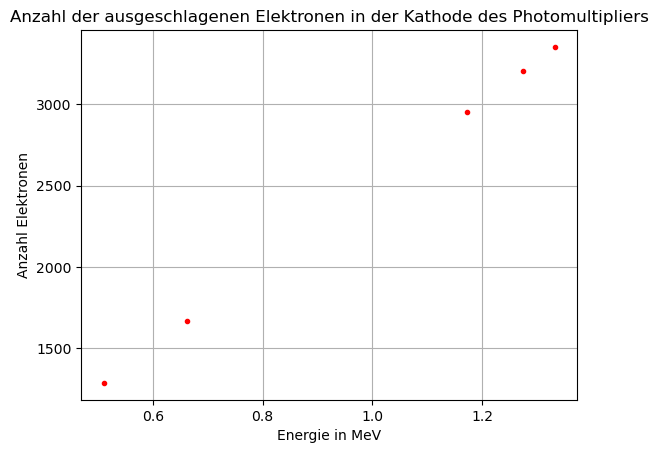

In [10]:
A = fit[0][0]

def rel_ener(E_y):
    return 8*np.log(2)**2*E_y/A**2

plt.plot(E_photo,rel_ener(np.array(E_photo)),'r.')
plt.xlabel('Energie in MeV')
plt.ylabel('Anzahl Elektronen')
plt.title('Anzahl der ausgeschlagenen Elektronen in der Kathode des Photomultipliers')
plt.grid()

Hier wird die relative Energieauflösung des Detektors bestimmt. Diese lässt sich bestimmen durch die FWHM (Full Width at Half Maximum), mit $fwhm = \sigma_i \cdot 2\sqrt{2ln2}$. Im vorliegenden Fit wurde jedoch statt der relativen Energieauflösung die absolute Energieauflösung verwendet und in der zu bestimmenden Gleichung damit multipliziert. Das vereinfacht die Umrechnungen. 

Die Qualität des Fits ist sehr schlecht, da einer der Punkte sehr stark abweicht. Ob hier ein Fehler gemacht wurde, konnte auch nach mehreren Stunden nicht herausgefunden werden. Im folgenden Diagramm ist die ausgelöste Elektronenzahl in der Photokathode gegenüber der Energie des eintreffenden Photons zu sehen. Die Formel, die zur Berechnung dieser Elektronenzahl verwendet wird wurde aus statistischen Zusammenhängen hergeleitet und ergibt sich zu $N_e = 8*ln^2 2 \cdot \frac{E_{\gamma}}{A^2}$


---

## Aufgabe 3: Detektorakzeptanz

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie Rate aufgezeichneter Photonen für $_{\hphantom{0}55}^{137}\mathrm{Cs}$ bei fünf verschiedenen Abständen des Präparats von der Detektorstirnfläche.  
 * Schätzen Sie ab und begründen Sie, ob eine Korrektur auf den unterliegenden Untergrund notwendig ist. 
 * Schätzen Sie ab und begründen Sie, ob eine Korrektur des Detektors auf pile-up notwendig ist.
 * Fügen Sie eine Darstellung der bestimmten Messpunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 
 
---

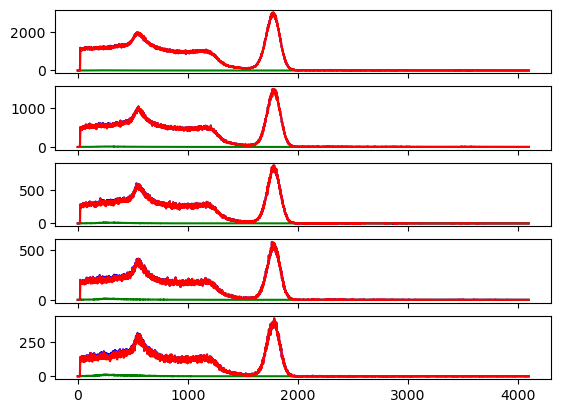

In [11]:
spektrum_cs_0 = pd.read_csv("Messungen/Spektrum_Caesium_3min_0mm.csv")
cs_0 = np.array(spektrum_cs_0["# mcpha spectrum 20240322-041904"])

spektrum_cs_1 = pd.read_csv("Messungen/Spektrum_Caesium_3min_10mm.csv")
cs_1 = np.array(spektrum_cs_1["# mcpha spectrum 20240322-042525"])

spektrum_cs_2 = pd.read_csv("Messungen/Spektrum_Caesium_3min_20mm.csv")
cs_2 = np.array(spektrum_cs_2["# mcpha spectrum 20240322-042911"])

spektrum_cs_3 = pd.read_csv("Messungen/Spektrum_Caesium_3min_30mm.csv")
cs_3 = np.array(spektrum_cs_3["# mcpha spectrum 20240322-043508"])

spektrum_cs_4 = pd.read_csv("Messungen/Spektrum_Caesium_3min_40mm.csv")
cs_4 = np.array(spektrum_cs_4["# mcpha spectrum 20240322-044006"])

untergrund_hist = pd.read_csv("Messungen/Untergrund_Hist.csv")
untergrund = np.array(untergrund_hist["# mcpha spectrum 20240322-032733"]) / 10

fig, ax = plt.subplots(5, sharex=True)
ax[0].plot(cs_0, label="0mm", color="b")
ax[0].plot(untergrund, label="utgrd", color="g")
ax[0].plot(cs_0-untergrund, label="diff", color="r")

ax[1].plot(cs_1, label="10mm", color="b")
ax[1].plot(untergrund, label="utgrd", color="g")
ax[1].plot(cs_1-untergrund, label="diff", color="r")

ax[2].plot(cs_2, label="20mm", color="b")
ax[2].plot(untergrund, label="utgrd", color="g")
ax[2].plot(cs_2-untergrund, label="diff", color="r")

ax[3].plot(cs_3, label="30mm", color="b")
ax[3].plot(untergrund, label="utgrd", color="g")
ax[3].plot(cs_3-untergrund, label="diff", color="r")

ax[4].plot(cs_4, label="40mm", color="b")
ax[4].plot(untergrund, label="utgrd", color="g")
ax[4].plot(cs_4-untergrund, label="diff", color="r")

plt.show()

In obigem Plot ist jeweils in blau das für 5 verschiedene Abstände des Präparats vom Detektor aufgenommene Spektrum, in grün der einmal aufgenommene Hintergrund und in rot schließlich das auf den Untegrund korrigierte Spektrum zu sehen. Da der Untergrund $30\,min$ lang, die Spektren aber jeweils nur $3\,min$ lang aufgenommen wurden, wurden die Werte des Untergrunds durch $10$ geteilt.  

Laut der Vorbereitung kann der Effekt von pile-up dadurch abgeschätzt werden, dass man die auf den Untergrund korrigierte Anzahl an Einträgen rechts des Photopeaks zählt. Da der Untergrund aber nur für den unteren Bin-Bereich (etwa die ersten $1000$ Bins), also für niedrige Energien, eine Rolle spielt und selbst dort nur wenig Auswirkungen hat, kann der Effekt von pile-up vernachlässigt werden. Man sieht nämlich, dass sich das korrigierte Spektrum mit dem ursprünglichen deckt. Ob man die Anzahl an Einträgen aber irgendwie im Fit verarbeiten soll, dazu stand in der Vorbereitung nichts konkretes, und da der Effekt sowieso vernachlässigbar ist, wurde er im Fit nicht berücksichtigt.

In [12]:

# Caesium in 5 verschiedenen Abständen 
# Abstand in m
d = np.array([0.0, 10.0, 20.5, 30.0, 40.0]) * 10**(-3)
# Unsicherheit auf die Ablesung des Abstandes in m
d_std = 1.5*10**(-4)
# Durchschnittliche Rate in 1/s
avg_rate = np.array([11.3, 5.33, 2.96, 1.99, 1.41]) * 10**3

In [13]:
# Modell-Funktion für Detektorakzeptanz
def akzeptanz(d, c=1, abst_präp=20*10**(-3), utgrd=30):
    return c * 1/((d+abst_präp)**2) + utgrd

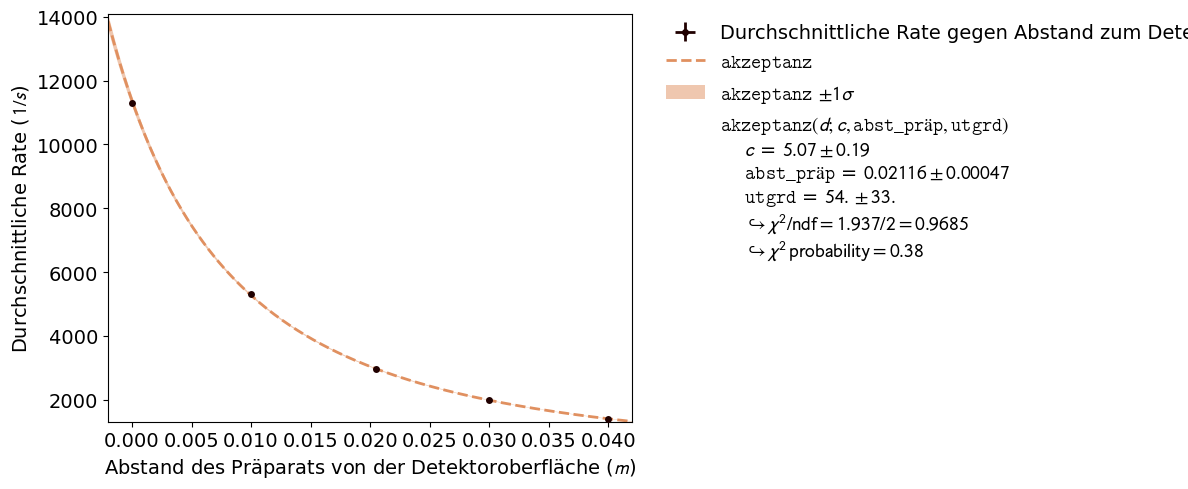

In [14]:
akzeptanz_data = np.array([d, avg_rate])
akzeptanz_error = np.array([d_std, 1])
akzeptanz_label = [ f"Abstand des Präparats von der Detektoroberfläche ($m$)" , f"Durchschnittliche Rate ($\,1/s$)" ]
akzeptanz_title = "Durchschnittliche Rate gegen Abstand zum Detektor"

values, errors, plot = fit_funktion(akzeptanz_data, akzeptanz, akzeptanz_error, akzeptanz_label, akzeptanz_title)
plot.plot()
plot.show()

Eine Korrektur auf den unterliegenden Untergrund wurde in Form einer konstanten Rate vorgenommen, wie in der Vorbereitung angegeben. Da der Wert von $(54\pm33)\,1/s$, den man aus dem Fit erhält, 2 Größenordnungen unter der geringsten gemessenen durchschnittlichen Rate liegt, ist er im Prinzip vernachlässigbar, aber die Angabe schadet dennoch nicht.

Man erhält aus dem Fit also die folgende Funktion für die Detektor Akzeptanz:  
$$A(d)=c_1 \cdot \frac{1}{(d+c_2)^2}+c_3=5.07\frac{\,m^2}{\,s} \cdot \frac{1}{(d+0.02116\,m)^2}+54\,\frac{1}{\,s}$$   
wobei $c_1=(5.07\pm0.19)\frac{\,m^2}{s}$, $c_2=(2.116\pm0.047)\,cm$ und $c_3=(54\pm33)\,\frac{1}{\,s}$  

Da in der Vorbereitung nichts weiter zur Detektorakzeptanz stand, bis auf die Proportionalität $A\propto 1/d^2$, wurde im Fit die Durchschnittliche Rate gegen den Abstand aufgetragen und dementsprechend angenommen, dass die Akzeptanz die Einheit $1/s$ hat.


---